area&weight, linear regression(sklearn)

In [1]:
# import libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets
import pandas as pd
import io
import json
import csv
import os

from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive/뱀장어 평균 중량인식 공모전/data/dataset')

Mounted at /content/drive


In [2]:
# train 폴더목록 불러오기
folder_list = os.listdir('./train')
folder_list.sort()

#'한 영상 안에서의 뱀장어의 평균 중량' list
Area_list_video=[]
# train 폴더 내 json파일 목록 불러오기
for folder in folder_list:
  path = './train/' + folder
  train_folder_list = os.listdir(path)
  train_folder_list.sort()

  # json 파일만 불러오기
  json_file_list = [file for file in train_folder_list if file.endswith('.json')]

  dict = {}
  #'한 json파일 안의 뱀장어 n마리의 평균 중량' list
  Area_list_json=[]
  # json 파일의 폴리곤 데이터값을 dict로 불러오기
  for json_file in json_file_list:
    with open((path + '/' + json_file),'r') as f:
      dict = json.load(f)
      #print(dict)

    #'한 json파일 안에서 선별된 뱀장어 각각의 중량' list
    Area_list_n = []
    for poly_num in range(len(dict['data'])):
      # 폴리곤 좌표 이용하여 넓이 구하기
      x_point = dict['data'][poly_num]['x']
      y_point = dict['data'][poly_num]['y']

      def PolyArea(x_point,y_point):
        return 0.5*np.abs(np.dot(x_point,np.roll(y_point,1))-np.dot(y_point,np.roll(x_point,1)))

      area=PolyArea(x_point,y_point)
      Area_list_n.append(area)
    avg_area_n = sum(Area_list_n)/len(Area_list_n)
    Area_list_json.append(avg_area_n)
  avg_area_json = sum(Area_list_json)/len(Area_list_json)
  Area_list_video.append(avg_area_json)

In [ ]:
print(Area_list_video)
print(len(Area_list_video))

[1530.0917324117788, 1597.271297701618, 691.3977733148681, 751.3579362399257, 577.4320079431355, 1373.7333301219503, 722.257640719674, 642.4761908775639, 767.1684724861364, 1669.7131727600508, 653.0102271550023, 586.7270497479072, 1677.9273889562432, 1612.6329668181154, 575.3908651989371, 1634.9860768255119, 702.7979240439298, 555.293564216672, 751.0888617911639, 1419.2303985932288, 698.2575879704233, 755.1091718412142, 770.4037900941219, 1747.8408480866724, 1624.9219711434305, 1579.0697968779064, 1887.5133263192092, 800.8338644533775, 1328.9934600970912, 1669.1631794680068, 658.8348555452278, 648.2612531977002, 649.7642645181076, 671.5978727048457, 666.407881313552, 1247.9721791987943, 1337.7768267652675, 777.0840390625112, 689.1927808433122, 715.6707189431547, 1562.6593902670586, 603.247538688205, 1670.665606308423, 1543.41733223879, 731.865402410205, 549.2888564167177, 791.6558482433151, 587.5438656567045, 1668.3070420267907, 606.0141931537775, 748.0393862538499, 786.5446802197157, 

In [ ]:
train_csv = pd.read_csv('./train.csv')
#train_csv 정렬
train_csv=train_csv.sort_values(by='ImageDir', ascending=True)
train_csv.head()

,ImageDir,AvgWeight
19,09xhTGOWvG,72.089286
117,1IfHWGbtMf,95.033696
8,2FINMdB8FA,27.564475
60,2ZUn5NjsOy,45.250000
110,2io6VOZw5l,21.020000


In [ ]:
AvgWeight = train_csv.loc[:, 'AvgWeight']
AvgWeight

19     72.089286
117    95.033696
8      27.564475
60     45.250000
110    21.020000
         ...    
24     55.283333
123    27.598478
44     47.373636
120    28.102391
29     27.009400
Name: AvgWeight, Length: 124, dtype: float64

Linear Regression model 적용하기

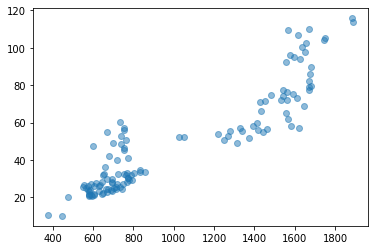

In [ ]:
Area = torch.Tensor(Area_list_video)
Weight = torch.Tensor(AvgWeight)
x_train = Area  # X for model training
x_train = x_train.reshape(-1,1)
y_train = Weight   # y label

plt.scatter(x_train, y_train, alpha=0.5)

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

w1=lm.coef_
b=lm.intercept_

NameError: ignored

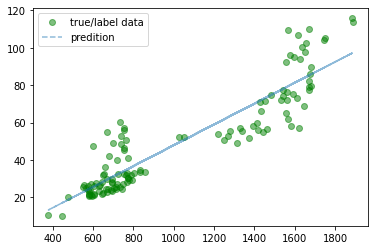

In [ ]:
y_fit = w1*Area_list_video + b
plt.clf()
plt.plot(x_train, y_train, 'go', label='true/label data', alpha=0.5) 
plt.plot(x_train, y_fit, '--', label='predition', alpha=0.5)
plt.legend(loc='best')
plt.show()

x_test만들기

In [ ]:
# test 폴더목록 불러오기
folder_list = os.listdir('./test')
folder_list.sort()

#'한 영상 안에서의 뱀장어의 평균 중량' list
Area_list_video=[]
# test 폴더 내 json파일 목록 불러오기
for folder in folder_list:
  path = './test/' + folder
  test_folder_list = os.listdir(path)
  test_folder_list.sort()

  # json 파일만 불러오기
  json_file_list = [file for file in test_folder_list if file.endswith('.json')]

  dict = {}
  #'한 json파일 안의 뱀장어 n마리의 평균 중량' list
  Area_list_json=[]
  # json 파일의 폴리곤 데이터값을 dict로 불러오기
  for json_file in json_file_list:
    with open((path + '/' + json_file),'r') as f:
      dict = json.load(f)
      #print(dict)

    #'한 json파일 안에서 선별된 뱀장어 각각의 중량' list
    Area_list_n = []
    for poly_num in range(len(dict['data'])):
      # 폴리곤 좌표 이용하여 넓이 구하기
      x_point = dict['data'][poly_num]['x']
      y_point = dict['data'][poly_num]['y']

      def PolyArea(x_point,y_point):
        return 0.5*np.abs(np.dot(x_point,np.roll(y_point,1))-np.dot(y_point,np.roll(x_point,1)))

      area=PolyArea(x_point,y_point)
      Area_list_n.append(area)
    avg_area_n = sum(Area_list_n)/len(Area_list_n)
    Area_list_json.append(avg_area_n)
  avg_area_json = sum(Area_list_json)/len(Area_list_json)
  Area_list_video.append(avg_area_json)

In [ ]:
print(Area_list_video)
print(len(Area_list_video))

[1530.0917324117788, 1597.271297701618, 691.3977733148681, 751.3579362399257, 577.4320079431355, 1373.7333301219503, 722.257640719674, 642.4761908775639, 767.1684724861364, 1669.7131727600508, 653.0102271550023, 586.7270497479072, 1677.9273889562432, 1612.6329668181154, 575.3908651989371, 1634.9860768255119, 702.7979240439298, 555.293564216672, 751.0888617911639, 1419.2303985932288, 698.2575879704233, 755.1091718412142, 770.4037900941219, 1747.8408480866724, 1624.9219711434305, 1579.0697968779064, 1887.5133263192092, 800.8338644533775, 1328.9934600970912, 1669.1631794680068, 658.8348555452278, 648.2612531977002, 649.7642645181076, 671.5978727048457, 666.407881313552, 1247.9721791987943, 1337.7768267652675, 777.0840390625112, 689.1927808433122, 715.6707189431547, 1562.6593902670586, 603.247538688205, 1670.665606308423, 1543.41733223879, 731.865402410205, 549.2888564167177, 791.6558482433151, 587.5438656567045, 1668.3070420267907, 606.0141931537775, 748.0393862538499, 786.5446802197157, 

In [ ]:
Area = torch.Tensor(Area_list_video)
x_test = Area  # X for model training
x_test = x_test.reshape(-1,1)

예측하기

In [ ]:
predictions = lm.predict(x_test)

NameError: ignored

csv파일 만들기

In [ ]:
data = {'ImageDir':folder_list, 'AvgWeight':predictions}
 
df = pd.DataFrame(data)
df

In [ ]:
csv_path = '/content/drive/MyDrive/뱀장어 평균 중량인식 공모전/data/dataset'
df.to_csv(csv_path+'/test.csv')